In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.ticker as mtick
sns.set()
plt.rcParams['image.cmap'] = 'viridis'

# Data Loading

In [ ]:
df1=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ML/data.csv')
df1.head()

,filename,tempo,beats,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,blues.00081.au,103.359375,50,0.380260,0.248262,2116.942959,1956.611056,4196.107960,0.127272,-26.929785,...,14.336612,-13.821769,7.562789,-6.181372,0.330165,-6.829571,0.965922,-7.570825,2.918987,blues
1,blues.00022.au,95.703125,44,0.306451,0.113475,1156.070496,1497.668176,2170.053545,0.058613,-233.860772,...,-2.250578,3.959198,5.322555,0.812028,-1.107202,-4.556555,-2.436490,3.316913,-0.608485,blues
2,blues.00031.au,151.999081,75,0.253487,0.151571,1331.073970,1973.643437,2900.174130,0.042967,-221.802549,...,-13.037723,-12.652228,-1.821905,-7.260097,-6.660252,-14.682694,-11.719264,-11.025216,-13.387260,blues
3,blues.00012.au,184.570312,91,0.269320,0.119072,1361.045467,1567.804596,2739.625101,0.069124,-207.208080,...,-0.613248,0.384877,2.605128,-5.188924,-9.527455,-9.244394,-2.848274,-1.418707,-5.932607,blues
4,blues.00056.au,161.499023,74,0.391059,0.137728,1811.076084,2052.332563,3927.809582,0.075480,-145.434568,...,7.457218,-10.470444,-2.360483,-6.783623,2.671134,-4.760879,-0.949005,0.024832,-2.005315,blues


In [ ]:
df1.shape

(1000, 30)

In [ ]:
df2=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ML/data_2genre.csv')
df2.head()

,filename,tempo,beats,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,pop.00024.au,117.453835,57,0.410990,0.207584,3301.781785,3175.656592,7302.597509,0.144527,-40.802069,...,-0.568772,0.552448,-1.981371,1.915755,0.076505,-1.270496,1.233082,1.493700,0.949931,1
1,pop.00099.au,78.302557,38,0.360462,0.138195,2765.747194,3222.713605,6873.391771,0.096015,-119.320605,...,1.566938,-2.932391,-1.609138,-0.200545,-2.429376,1.207988,5.848729,1.609469,7.580263,1
2,pop.00009.au,107.666016,50,0.454810,0.159711,3279.877315,3026.391118,6953.099622,0.172819,-35.277026,...,-0.518891,0.212918,-1.294660,-0.105626,-1.245879,-2.528455,0.571032,1.569434,-1.724873,1
3,pop.00078.au,103.359375,52,0.454698,0.223419,3124.176350,2970.320532,6618.134981,0.142721,-42.757179,...,3.020176,-1.242321,-3.524069,-0.325165,-1.443294,-1.864617,-0.031307,-0.729631,-0.987611,1
4,pop.00037.au,103.359375,51,0.451668,0.240985,3236.413205,2953.596262,6698.776160,0.164825,4.821123,...,1.753352,3.336132,2.352307,1.428845,-0.604926,-2.185691,-1.602394,-0.612146,-4.050126,1


In [ ]:
df2.shape

(200, 30)

In [ ]:
df = pd.concat([df1, df2])
df.head()

,filename,tempo,beats,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,blues.00081.au,103.359375,50,0.380260,0.248262,2116.942959,1956.611056,4196.107960,0.127272,-26.929785,...,14.336612,-13.821769,7.562789,-6.181372,0.330165,-6.829571,0.965922,-7.570825,2.918987,blues
1,blues.00022.au,95.703125,44,0.306451,0.113475,1156.070496,1497.668176,2170.053545,0.058613,-233.860772,...,-2.250578,3.959198,5.322555,0.812028,-1.107202,-4.556555,-2.436490,3.316913,-0.608485,blues
2,blues.00031.au,151.999081,75,0.253487,0.151571,1331.073970,1973.643437,2900.174130,0.042967,-221.802549,...,-13.037723,-12.652228,-1.821905,-7.260097,-6.660252,-14.682694,-11.719264,-11.025216,-13.387260,blues
3,blues.00012.au,184.570312,91,0.269320,0.119072,1361.045467,1567.804596,2739.625101,0.069124,-207.208080,...,-0.613248,0.384877,2.605128,-5.188924,-9.527455,-9.244394,-2.848274,-1.418707,-5.932607,blues
4,blues.00056.au,161.499023,74,0.391059,0.137728,1811.076084,2052.332563,3927.809582,0.075480,-145.434568,...,7.457218,-10.470444,-2.360483,-6.783623,2.671134,-4.760879,-0.949005,0.024832,-2.005315,blues


In [ ]:
df.shape

(1200, 30)

# Data Understanding

In [ ]:
df['label'].value_counts()

blues        100
classical    100
country      100
disco        100
hiphop       100
jazz         100
metal        100
pop          100
reggae       100
rock         100
1            100
2            100
Name: label, dtype: int64

In [ ]:
#By looking at the data I see that "1" corresponds to "pop" and the "2" corresponds to "classical".
df['label'] = df['label'].replace(to_replace={1: 'pop', 2: 'classical'})

In [ ]:
df['label'].value_counts()

classical    200
pop          200
blues        100
country      100
disco        100
hiphop       100
jazz         100
metal        100
reggae       100
rock         100
Name: label, dtype: int64

In [ ]:
df.isna().sum()

filename              0
tempo                 0
beats                 0
chroma_stft           0
rmse                  0
spectral_centroid     0
spectral_bandwidth    0
rolloff               0
zero_crossing_rate    0
mfcc1                 0
mfcc2                 0
mfcc3                 0
mfcc4                 0
mfcc5                 0
mfcc6                 0
mfcc7                 0
mfcc8                 0
mfcc9                 0
mfcc10                0
mfcc11                0
mfcc12                0
mfcc13                0
mfcc14                0
mfcc15                0
mfcc16                0
mfcc17                0
mfcc18                0
mfcc19                0
mfcc20                0
label                 0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1200 entries, 0 to 199
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   filename            1200 non-null   object 
 1   tempo               1200 non-null   float64
 2   beats               1200 non-null   int64  
 3   chroma_stft         1200 non-null   float64
 4   rmse                1200 non-null   float64
 5   spectral_centroid   1200 non-null   float64
 6   spectral_bandwidth  1200 non-null   float64
 7   rolloff             1200 non-null   float64
 8   zero_crossing_rate  1200 non-null   float64
 9   mfcc1               1200 non-null   float64
 10  mfcc2               1200 non-null   float64
 11  mfcc3               1200 non-null   float64
 12  mfcc4               1200 non-null   float64
 13  mfcc5               1200 non-null   float64
 14  mfcc6               1200 non-null   float64
 15  mfcc7               1200 non-null   float64
 16  mfcc8  

# Data Visualisation

Text(0, 0.5, 'Mean Spectral Centroid')

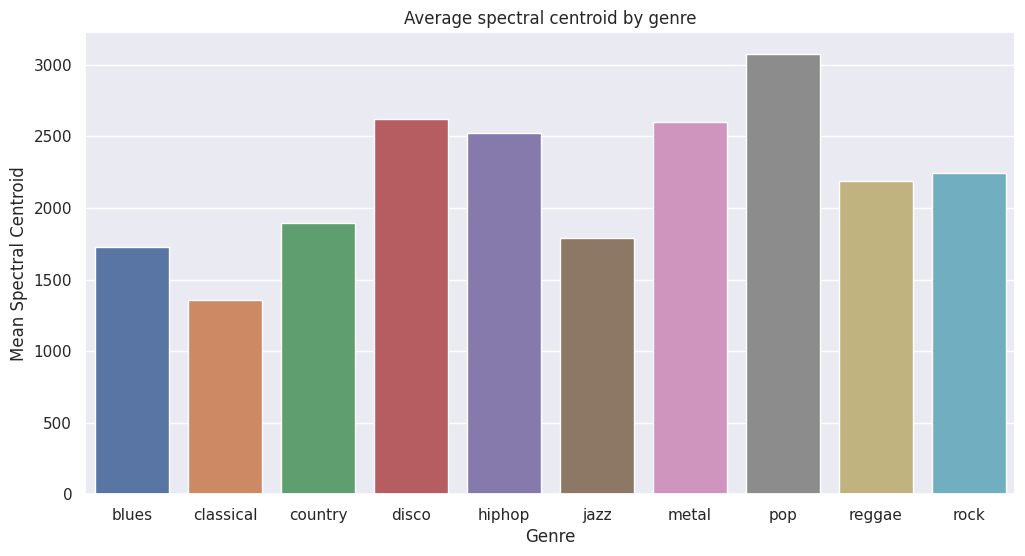

In [ ]:
plt.figure(figsize=(12,6))
genres = df['label'].unique()
spectral_centroids = [ df[df['label']==x].spectral_centroid.mean() for x in genres ]
sns.barplot(x=genres, y=spectral_centroids, palette="deep")
plt.title("Average spectral centroid by genre", fontsize = 12)
plt.xlabel('Genre', fontsize = 12)
plt.ylabel('Mean Spectral Centroid', fontsize = 12)

Text(0, 0.5, 'Mean Tempo')

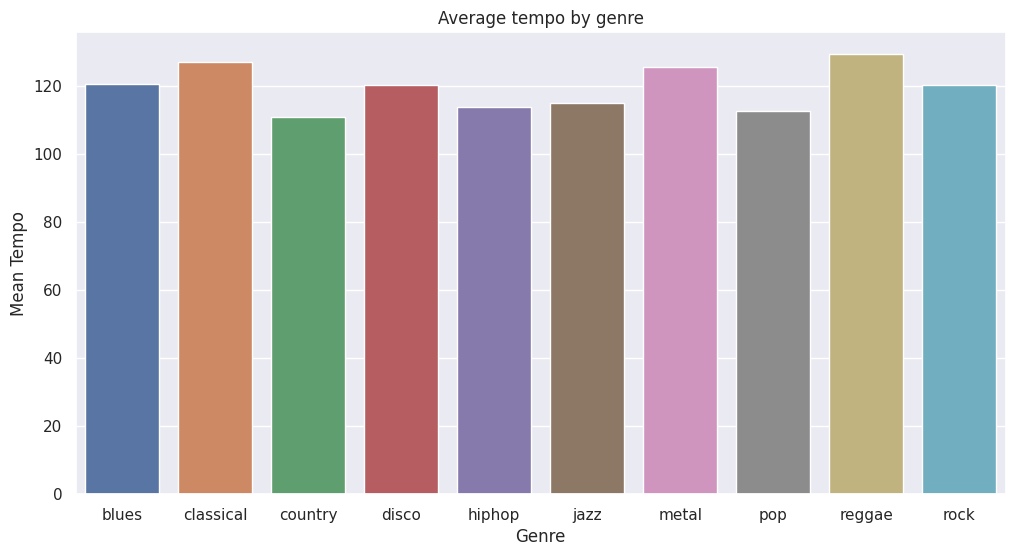

In [ ]:
plt.figure(figsize=(12,6))
genres = df['label'].unique()
tempos = [ df[df['label']==x].tempo.mean() for x in genres ]
sns.barplot(x=genres, y=tempos, palette="deep")
plt.title("Average tempo by genre", fontsize = 12)
plt.xlabel('Genre', fontsize = 12)
plt.ylabel('Mean Tempo', fontsize = 12)

Text(0, 0.5, 'Mean Spectral Bandwidth')

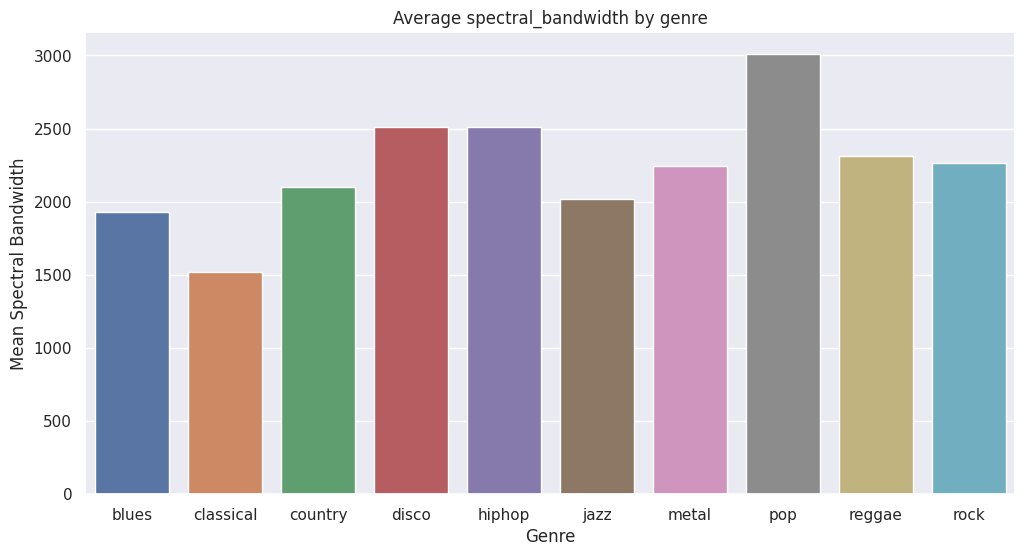

In [ ]:
plt.figure(figsize=(12,6))
genres = df['label'].unique()
spectral_bandwidths = [ df[df['label']==x].spectral_bandwidth.mean() for x in genres ]
sns.barplot(x=genres, y=spectral_bandwidths, palette="deep")
plt.title("Average spectral_bandwidth by genre", fontsize = 12)
plt.xlabel('Genre', fontsize = 12)
plt.ylabel('Mean Spectral Bandwidth', fontsize = 12)

Text(0, 0.5, 'Rolloff')

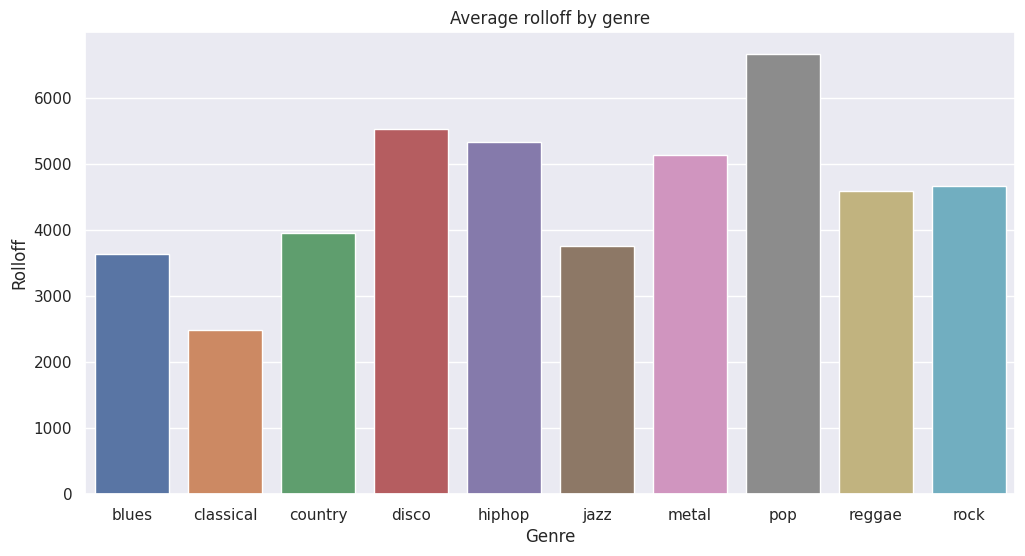

In [ ]:
plt.figure(figsize=(12,6))
genres = df['label'].unique()
rolloffs = [ df[df['label']==x].rolloff.mean() for x in genres ]
sns.barplot(x=genres, y=rolloffs, palette="deep")
plt.title("Average rolloff by genre", fontsize = 12)
plt.xlabel('Genre', fontsize = 12)
plt.ylabel('Rolloff', fontsize = 12)

<ipython-input-19-82d292485387>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = df.corr()


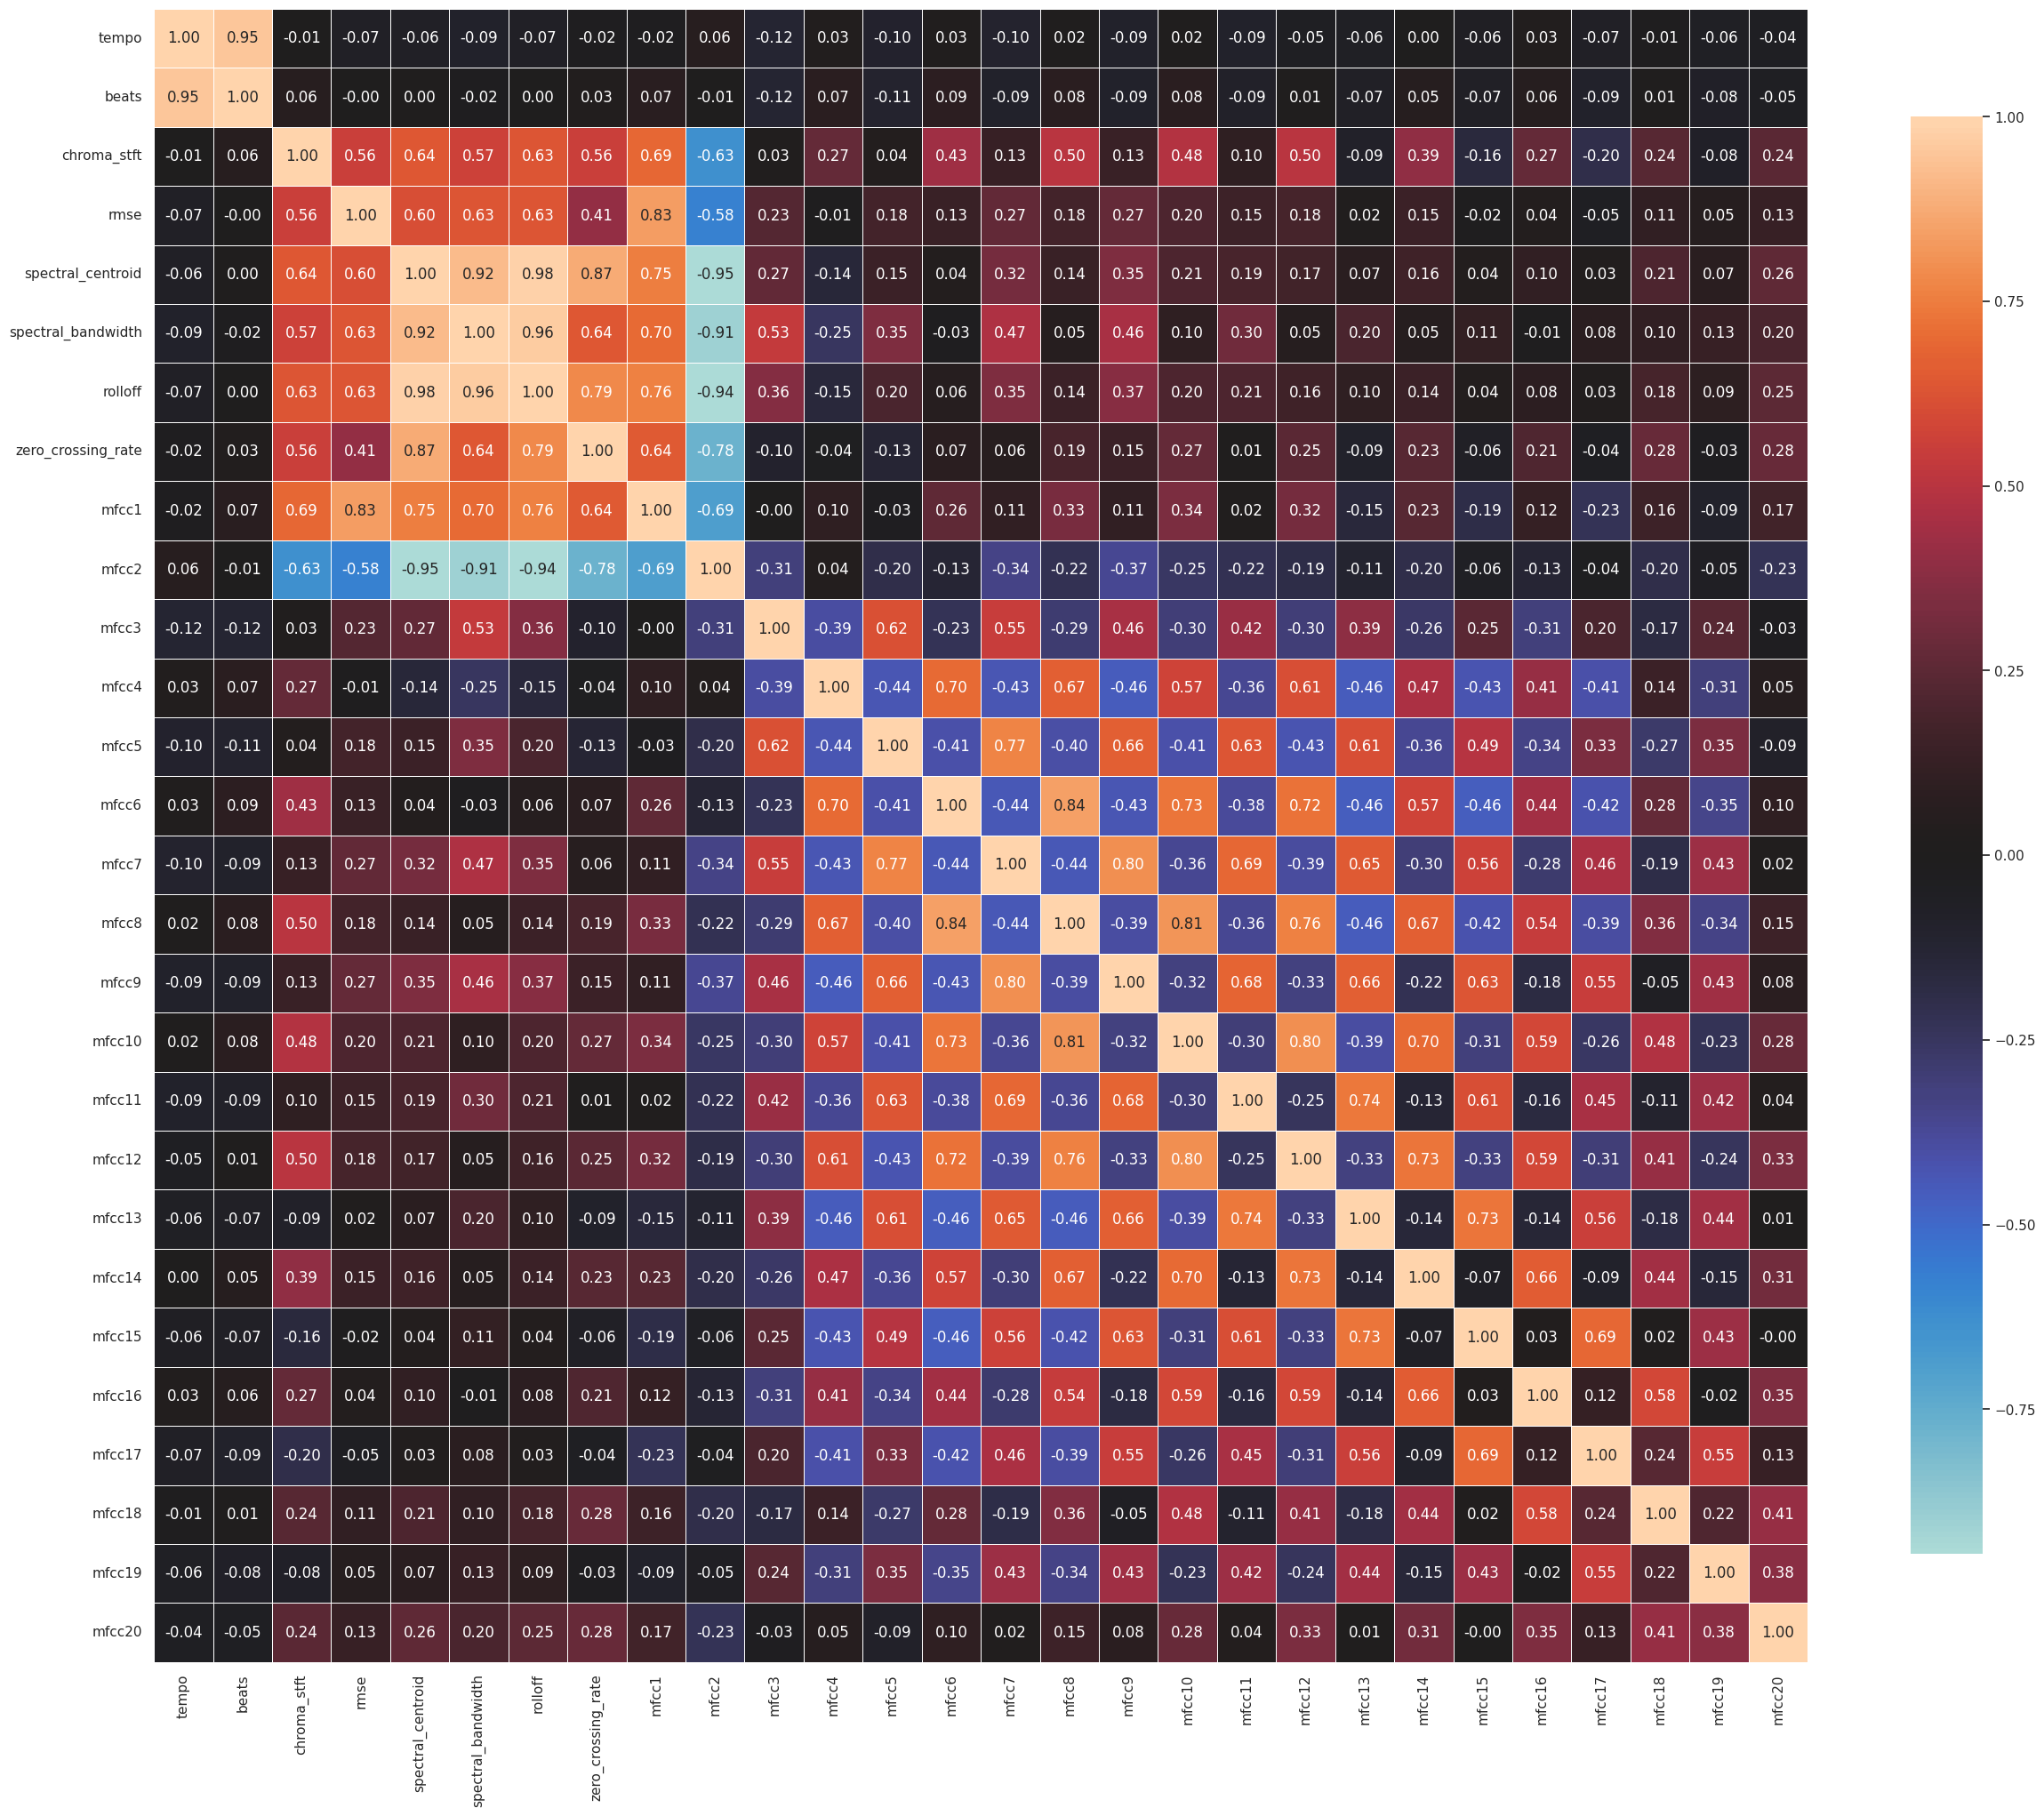

In [ ]:
correlations = df.corr()
fig, ax = plt.subplots(figsize=(30,30))
sns.heatmap(correlations, vmax=1.0, center=0, fmt='.2f',
            square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .70})
plt.show()

# Data Preprocessing

In [ ]:
df = df.drop('filename', axis=1)

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['label'] = encoder.fit_transform(df['label'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1200 entries, 0 to 199
Data columns (total 29 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tempo               1200 non-null   float64
 1   beats               1200 non-null   int64  
 2   chroma_stft         1200 non-null   float64
 3   rmse                1200 non-null   float64
 4   spectral_centroid   1200 non-null   float64
 5   spectral_bandwidth  1200 non-null   float64
 6   rolloff             1200 non-null   float64
 7   zero_crossing_rate  1200 non-null   float64
 8   mfcc1               1200 non-null   float64
 9   mfcc2               1200 non-null   float64
 10  mfcc3               1200 non-null   float64
 11  mfcc4               1200 non-null   float64
 12  mfcc5               1200 non-null   float64
 13  mfcc6               1200 non-null   float64
 14  mfcc7               1200 non-null   float64
 15  mfcc8               1200 non-null   float64
 16  mfcc9  

# Model Building

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

In [ ]:
from sklearn.cluster import KMeans
num_clusters = 10  # Adjust the number of clusters based on your dataset
kmeans = KMeans(n_clusters=num_clusters)
predicted_labels = kmeans.fit_predict(scaled_data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
from sklearn.metrics import silhouette_score

# Calculate silhouette score
silhouette_avg = silhouette_score(scaled_data, predicted_labels)

# Calculate within-cluster sum of squares (WCSS)
wcss = kmeans.inertia_

In [ ]:
# Print the evaluation metrics
print("Silhouette Score:", silhouette_avg)
print("WCSS:", wcss)

Silhouette Score: 0.1308386352390616
WCSS: 15306.369237783741
